# Assignment 2: Spam Classification with SVM

### CS 6316 Machine Learning - Department of Computer Science - University of Virginia
*Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the assignment, you will use SVMs to build your own spam filter. For references, you may refer to my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) or Chapter 5 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.*


---
## 1. PRE-PROCESSING THE DATA (15 pts)

**Data Acquiring:** Download the dataset from https://archive.ics.uci.edu/ml/datasets/Spambase

**Data Splitting:** Put data into the format needed for SVM, then split it into 80% training, 20% testing (each should have approximately the same proportion of position and negative examples).

**Data Discovery:** Plot out all correlations among the features. You may notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. 

**Feature Scaling** You can use the standard Scikit-Learn library can write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

In [1]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

# Your code goes here for this section.
df = pd.read_csv("spambase.data", delimiter=',',header=None)
df.columns = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam']
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

In [3]:
df.isna().any()

word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george              False
word_freq_650               

In [4]:
df.isnull().any()

word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george              False
word_freq_650               

In [5]:
corr_matrix = df.corr()

In [6]:
corr_matrix["spam"].sort_values(ascending=False)

spam                          1.000000
word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_$                   0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_!                   0.241888
word_freq_receive             0.234529
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
word_freq_all                 0.196988
word_freq_addresses           0.195902
word_freq_credit              0.189761
word_freq_mail                0.138962
word_freq_people              0.132927
word_freq_make                0.126208
capital_run_length_average    0.109999
word_freq_font           

In [7]:
df_x = df
df_x = df_x.drop(["spam"],axis = 1)
df_y = df["spam"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, stratify=df_y)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

As we could see there were no missing or null values present neither any categorical data present, hence we do not need to Impute or encode our data. However as all 57 features are not of the same scale, we had to scale our dataset using Standard Scalar. Before scaling the data we had split the data in the ratio 4:1 in train and test data using startify so that the data is split with same proportions of negatives and postives, then individually scaled them.

- - -
## 2. TRAINING SVM FOR SPAM CLASSIFICATION (15 pts)

Run your linear SVM classifier on the training data, and test the resulting model on the test data. In this section, you may use the default **loss function** (hinge) and **default** value of the C hyperparameter (=1.0):

* Report accuracy, precision, recall?
* Create an ROC curve for this SVM on the test data, using 200 or more evenly spaced thresholds. You may use library function calls to create the ROC curve?

**Implementation Notes:** You do NOT need to add a column of 1's to the $\mathbf{
x}$ matrix to have an intercept term

In [10]:
from sklearn.svm import LinearSVC

# Training your svm here
svm_clf = LinearSVC(C=1, loss="hinge", random_state=42)

svm_clf.fit(X_train, y_train)
y_pred=svm_clf.predict(X_test)

# Testing your svm here
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve

accuracy=accuracy_score(y_test, y_pred)*100
precision=precision_score(y_test, y_pred)*100
recall=recall_score(y_test, y_pred)*100
y_scores = svm_clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

In [11]:
print("accuracy =", accuracy)
print("precision =", precision)
print("recall =", recall)

accuracy = 90.87947882736157
precision = 88.85793871866295
recall = 87.87878787878788


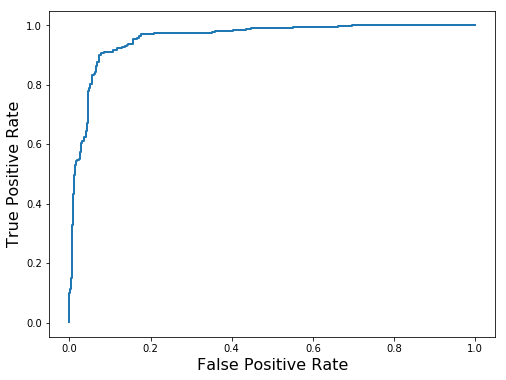

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
#plt.plot([0, 1], [0, 1], 'k--')
plt.axis=(0, 1, 0, 1)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.show()

- - -
## 3. TUNING C FOR LINEAR SVM (15 pts)
In this part of the assignment, you will try using different values of the C parameter with SVMs. Your task is to try different values of C on this dataset. For example, when C is small, you should find that the SVM puts the decision boundary in the gap between the two datasets and misclassifies the data point. When C is large, you should find that the SVM now classifies every single example correctly, but has a decision boundary that does not appear to be a natural fit for the data. 

In a 2-D feature space of your choice, you must be able to plot out the decision boundary of SVM for different values of C to earn credit for this section. Depends on your observation on the dataset, you must provide some justifications on the reason you select a certain value of C to tradeoff margin and data violation. 

In this section we have picked up 6 values for the parameter C - 0.001, 0.005, 0.01, 0.1, 1, 10.

In [14]:
# Use the following code to plot out your hyperparameter C
# You may plot multiple decision boundary corresponding to different C
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# plt.figure(figsize=(12,3))
# plt.subplot(121) 
# plt.xlabel("Feature 1", fontsize=14)
# plt.ylabel("Feature 2", fontsize=14)

f1=df.columns.get_loc("word_freq_your")
f2=df.columns.get_loc("word_freq_000")

svm_clf1 = LinearSVC(C=0.001, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=0.005, loss="hinge", random_state=42)
svm_clf3 = LinearSVC(C=0.01, loss="hinge", random_state=42)
svm_clf4 = LinearSVC(C=0.1, loss="hinge", random_state=42)
svm_clf5 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf6 = LinearSVC(C=10, loss="hinge", random_state=42)
svm_clf1.fit(X_train, y_train)
svm_clf2.fit(X_train, y_train)
svm_clf3.fit(X_train, y_train)
svm_clf4.fit(X_train, y_train)
svm_clf5.fit(X_train, y_train)
svm_clf6.fit(X_train, y_train)

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0)

From the correlation in the 1st section we observed that features - "word_freq_your" and "word_freq_000" were highly correlated feature to our label y. So we try to plot our decision boundary on these two features as we need to plot it in 2D plot.

In [15]:
y_pred1=svm_clf1.predict(X_test)
y_pred2=svm_clf2.predict(X_test)
y_pred3=svm_clf3.predict(X_test)
y_pred4=svm_clf4.predict(X_test)
y_pred5=svm_clf5.predict(X_test)
y_pred6=svm_clf6.predict(X_test)

In [16]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[f1]/w[f2] * x0 - b/w[f2]
    
    margin = 1/w[f2]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=100, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [17]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
b3 = svm_clf3.decision_function([-scaler.mean_ / scaler.scale_])
b4 = svm_clf4.decision_function([-scaler.mean_ / scaler.scale_])
b5 = svm_clf5.decision_function([-scaler.mean_ / scaler.scale_])
b6 = svm_clf6.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
w3 = svm_clf3.coef_[0] / scaler.scale_
w4 = svm_clf4.coef_[0] / scaler.scale_
w5 = svm_clf5.coef_[0] / scaler.scale_
w6 = svm_clf6.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf3.intercept_ = np.array([b3])
svm_clf4.intercept_ = np.array([b4])
svm_clf5.intercept_ = np.array([b5])
svm_clf6.intercept_ = np.array([b6])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])
svm_clf3.coef_ = np.array([w3])
svm_clf4.coef_ = np.array([w4])
svm_clf5.coef_ = np.array([w5])
svm_clf6.coef_ = np.array([w6])

# Find support vectors (LinearSVC does not do this automatically)
t = y_train * 2 - 1
support_vectors_idx1 = (t * (X_train.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X_train.dot(w2) + b2) < 1).ravel()
support_vectors_idx3 = (t * (X_train.dot(w3) + b3) < 1).ravel()
support_vectors_idx4 = (t * (X_train.dot(w4) + b4) < 1).ravel()
support_vectors_idx5 = (t * (X_train.dot(w5) + b5) < 1).ravel()
support_vectors_idx6 = (t * (X_train.dot(w6) + b6) < 1).ravel()
svm_clf1.support_vectors_ = X_train[support_vectors_idx1]
svm_clf2.support_vectors_ = X_train[support_vectors_idx2]
svm_clf3.support_vectors_ = X_train[support_vectors_idx3]
svm_clf4.support_vectors_ = X_train[support_vectors_idx4]
svm_clf5.support_vectors_ = X_train[support_vectors_idx5]
svm_clf6.support_vectors_ = X_train[support_vectors_idx6]

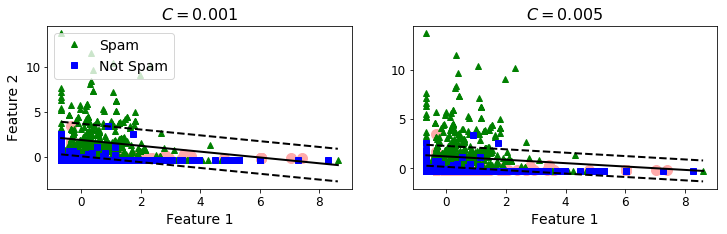

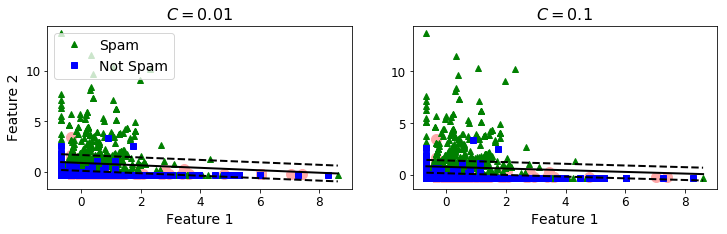

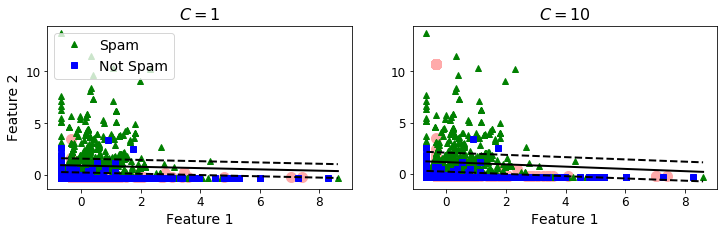

In [18]:
Xmin=np.amin(X_train[:,f1])
Xmax=np.amax(X_train[:,f1])
Ymin=np.amin(X_train[:,f2])
Ymax=np.amax(X_train[:,f2])

plt.figure(figsize=(12,3))
plt.subplot(121)
plt.plot(X_train[:, f1][y_train==1], X_train[:, f2][y_train==1], "g^", label="Spam")
plt.plot(X_train[:, f1][y_train==0], X_train[:, f2][y_train==0], "bs", label="Not Spam")
plot_svc_decision_boundary(svm_clf1, Xmin, Xmax)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
#plot_svc_decision_boundary(svm_clf1, Xmin, Xmax)
plt.axis=(Xmin,Xmax,Ymin,Ymax)


plt.subplot(122)
plt.plot(X_train[:, f1][y_train==1], X_train[:, f2][y_train==1], "g^")
plt.plot(X_train[:, f1][y_train==0], X_train[:, f2][y_train==0], "bs")
plot_svc_decision_boundary(svm_clf2, Xmin, Xmax)
plt.xlabel("Feature 1", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis=(Xmin,Xmax,Ymin,Ymax)


plt.figure(figsize=(12,3))
plt.subplot(121)
plt.plot(X_train[:, f1][y_train==1], X_train[:, f2][y_train==1], "g^", label="Spam")
plt.plot(X_train[:, f1][y_train==0], X_train[:, f2][y_train==0], "bs", label="Not Spam")
plot_svc_decision_boundary(svm_clf3, Xmin, Xmax)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf3.C), fontsize=16)
plt.axis=(Xmin,Xmax,Ymin,Ymax)

plt.subplot(122)
plt.plot(X_train[:, f1][y_train==1], X_train[:, f2][y_train==1], "g^")
plt.plot(X_train[:, f1][y_train==0], X_train[:, f2][y_train==0], "bs")
plot_svc_decision_boundary(svm_clf4, Xmin, Xmax)
plt.xlabel("Feature 1", fontsize=14)
plt.title("$C = {}$".format(svm_clf4.C), fontsize=16)
plt.axis=(Xmin,Xmax,Ymin,Ymax)

plt.figure(figsize=(12,3))
plt.subplot(121)
plt.plot(X_train[:, f1][y_train==1], X_train[:, f2][y_train==1], "g^", label="Spam")
plt.plot(X_train[:, f1][y_train==0], X_train[:, f2][y_train==0], "bs", label="Not Spam")
plot_svc_decision_boundary(svm_clf5, Xmin, Xmax)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf5.C), fontsize=16)
plt.axis=(Xmin,Xmax,Ymin,Ymax)

plt.subplot(122)
plt.plot(X_train[:, f1][y_train==1], X_train[:, f2][y_train==1], "g^")
plt.plot(X_train[:, f1][y_train==0], X_train[:, f2][y_train==0], "bs")
plot_svc_decision_boundary(svm_clf6, Xmin, Xmax)
plt.xlabel("Feature 1", fontsize=14)
plt.title("$C = {}$".format(svm_clf6.C), fontsize=16)
plt.axis=(Xmin,Xmax,Ymin,Ymax)

plt.show()

From the decision boundaries plotted for the 6 different C values, we can clearly observe that for C=0.01, we get the best decision boundary, having the maximum separation for spam and non-spam emails. So we take this value of C and test the next section.

- - -
## 4. SELECTING THE FEATURES WITH SVM (25 pts)

Once your learned a best linear SVM in previous sections, your task in this section is to select the best features. First, you must * Obtain the weight vector $\mathbf{w}$. Then, for the number of features $n = 2$ to 57, you will run the following (in a loop of course):

* Select the set of $n$ features that have the highest $\mathbf{w}_n$
* Train an SVM, $SVM_n$, on all training data, only using these $n$ features with the same hyperparameter C.
* Test $SVM_n$ on the test set (using the same $n$ features) to obtain accuracy.
* Plot accuracy on test data vs. $n$ number of features

In one paragraph, discuss the effects of feature selection including the top 5 features.

In [19]:
# Your feature selection code goes here
# For best C=0.01

svm_clf = LinearSVC(C=0.01, loss="hinge", random_state=42)
svm_clf.fit(X_train, y_train)
w = svm_clf.coef_[0] / scaler.scale_
# Your paragraph goes here for this section

In [20]:
ind = np.argpartition(w, -2)[-2:]
xlen=X_train.shape[0]
xlent=X_test.shape[0]
accuracy_n=[]
for i in range(2,58):
    ind = np.argpartition(w,-i)[-i:]
    X=np.empty([xlen,i])
    X_t=np.empty([xlent,i])
    if i==5:
        top5=ind
    for j in range(0,i):
        X[:,j]=X_train[:, ind[j]]
        X_t[:,j]=X_test[:, ind[j]]
    svm_clf = LinearSVC(C=0.01, loss="hinge", random_state=42)
    svm_clf.fit(X, y_train)
    y_pred=svm_clf.predict(X_t)
    accuracy_n.append(accuracy_score(y_test, y_pred)*100)

In [21]:
top5

array([53, 23,  6, 22, 52], dtype=int64)

In [22]:
print ("Top 5 features- ")
df.columns[top5]

Top 5 features- 


Index(['char_freq_#', 'word_freq_money', 'word_freq_remove', 'word_freq_000',
       'char_freq_$'],
      dtype='object')

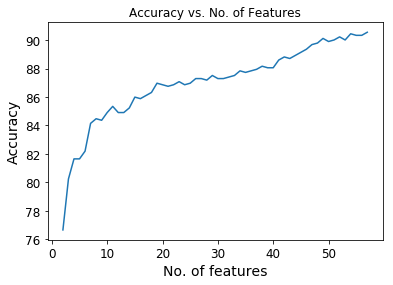

In [23]:
feature=[0] * 56
j=0
for i in range(2,58):
    feature[j]=i
    j=j+1
plt.xlabel('No. of features')  
plt.ylabel('Accuracy')
plt.title('Accuracy vs. No. of Features')
plt.plot(feature,accuracy_n)
plt.show()

- - -
## 5. KERNELIZING SVM WITH THE GAUSSIAN RBF (30 pts)

In this part of the asisgnment, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable. 

$
    \mathbf{K}_{RBF}(\mathbf{x}^{(i)},\mathbf{x}^{(j)}) = \exp(-\gamma ||\mathbf{x}^{(i)} -\mathbf{x}^{(j)}||^2).
$

Your task is to determine the best $C$ and $\gamma$ hyperparameters to use, run SVM on the spam data and report the performance in metrics similar to section 2. By using the Gaussian kernel with the SVM, you will be able to learn a non-linear decision boundary that can perform reasonably well for this dataset. 

Finally, run the version of SVM with the best hyperparameters on the test set, and plot out the comparison in terms of accuracy, precision, and recall, and the ROC curve) to those of linear SVM in Section 3. How much your SVM classifier perform better? 

**Implementation Note:** When implementing cross validation to select the best C and $\gamma$ parameter to use, you need to evaluate the error on the cross validation set. Recall that for classification, the error is defined as the fraction of the cross validation examples that were classified incorrectly.




In [24]:
from sklearn.svm import SVC
# hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2), ...
# for gamma, C in hyperparams:
#    rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=gamma, C=C))
#    rbf_kernel_svm_clf.fit(X_cv, y_cv)
#    # Your code to train and find the best value of C and gamma here

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'C': [0.001, 0.005, 0.01, 0.1, 1, 10], 'gamma': [0.01,0.1, 1, 5, 10]},
  ]

svm_clf = SVC(kernel='rbf',random_state=42)
grid_search = GridSearchCV(svm_clf, param_grid, cv=5,
                           scoring='roc_auc', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.001, 0.005, 0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [25]:
grid_search.best_params_

{'C': 10, 'gamma': 0.01}

In [26]:
final_svm = grid_search.best_estimator_

rbf_pred = final_svm.predict(X_test)

In [27]:
accuracy_rbf=accuracy_score(y_test, rbf_pred)*100
precision_rbf=precision_score(y_test, rbf_pred)*100
recall_rbf=recall_score(y_test, rbf_pred)*100
y_scores_rbf = final_svm.decision_function(X_test)
fpr_rbf, tpr_rbf, thresholds_rbf = roc_curve(y_test, y_scores_rbf)


accuracy_2=accuracy_score(y_test, y_pred2)*100
precision_2=precision_score(y_test, y_pred2)*100
recall_2=recall_score(y_test, y_pred2)*100
y_scores_2 = svm_clf2.decision_function(X_test)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_scores_2)


print("accuracy through rbf =", accuracy_rbf)
print("precision through rbf =", precision_rbf)
print("recall through rbf =", recall_rbf)

print("accuracy with linear model(C=0.01) =", accuracy_2)
print("precision with linear model(C=0.01) =", precision_2)
print("recall with linear model(C=0.01) =", recall_2)

accuracy through rbf = 92.61672095548317
precision through rbf = 91.78470254957507
recall through rbf = 89.25619834710744
accuracy with linear model(C=0.01) = 90.44516829533116
precision with linear model(C=0.01) = 89.62536023054754
recall with linear model(C=0.01) = 85.67493112947659


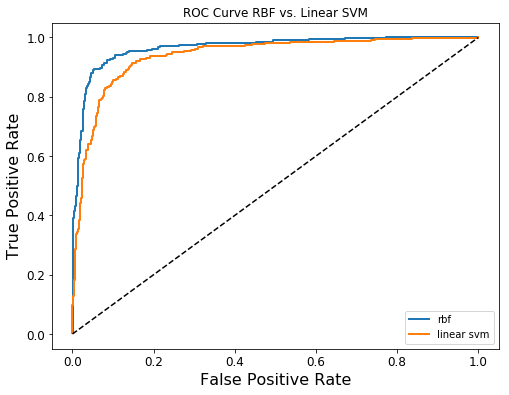

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rbf, tpr_rbf, linewidth=2, label="rbf")
plt.plot(fpr_2, tpr_2, linewidth=2, label="linear svm")
plt.plot([0, 1], [0, 1], 'k--')
plt.axis=(0, 1, 0, 1)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve RBF vs. Linear SVM')
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import precision_recall_curve

precisions_rbf, recalls_rbf, thresholds1_rbf = precision_recall_curve(y_test, y_scores_rbf)
precisions_2, recalls_2, thresholds1_2 = precision_recall_curve(y_test, y_scores_2)

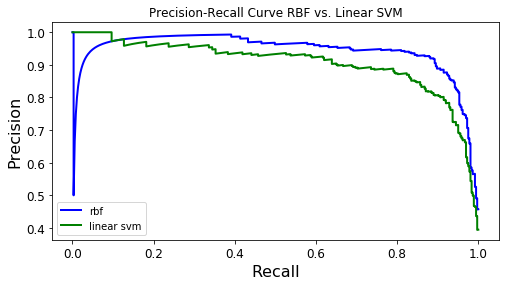

In [30]:
plt.figure(figsize=(8, 4))

plt.plot(recalls_rbf, precisions_rbf, "b-", linewidth=2,label="rbf")
plt.plot(recalls_2, precisions_2, "g-", linewidth=2,label="linear svm")
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.title('Precision-Recall Curve RBF vs. Linear SVM')
plt.legend()
plt.axis=(0, 1, 0, 1)

#plt.plot(thresholds1_rbf, precisions_rbf[:-1], "b--", label="Precision_rbf", linewidth=2)
#plt.plot(thresholds1_rbf, recalls_rbf[:-1], "g-", label="Recall_rbf", linewidth=2)
#plt.plot(thresholds1_2, precisions_2[:-1], "r-", label="Precision non-rbf", linewidth=2)
#plt.plot(thresholds1_2, recalls_2[:-1], "k-", label="Recall non-rbf", linewidth=2)
#plt.xlabel("Threshold", fontsize=16)
#plt.legend(loc="upper left", fontsize=16)
#plt.ylim([0, 1.1])

#plt.xlim([-30, 40])
plt.show()

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](https://docs.google.com/document/d/15qB84xjaS-uRJmfKmmQuCz38bLMFaoqdbuRLoZEdOYI/edit#heading=h.72k1pvft525n)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS6316 Assignment 2:...".

Best of luck and have fun!